## Simulando carteira Aleatoria

Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import yfinance as yf

In [2]:
sns.set()

Todos os ativos que contem no Ibovespa (2020)

In [3]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

Obtendo os dados

In [4]:
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

[*********************100%***********************]  73 of 73 completed

1 Failed download:
- PCAR4.SA: No data found, symbol may be delisted


Tratando os dados

In [5]:
ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  1 of 1 completed


In [6]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,...,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-13,19.209999,58.299999,42.887318,48.466496,32.176189,33.883518,33.239834,75.662498,38.266659,28.074499,...,28.402874,15.957516,69.065697,25.002672,9.451993,53.081078,54.548462,12.700000,34.046028,46.817467
2020-01-14,19.100000,59.189999,43.177425,48.206963,32.244347,33.844574,33.635437,74.222252,38.631104,28.084249,...,28.347181,16.025921,69.065697,25.279165,9.491624,53.407433,54.325401,13.350000,34.720600,47.798965
2020-01-15,18.760000,59.299999,42.017002,47.322609,31.504444,33.250633,33.672234,73.590904,38.727009,27.733198,...,28.551384,16.035690,69.234268,25.052048,9.303377,53.234657,54.009392,13.550000,34.948769,47.376919
2020-01-16,18.700001,59.439999,42.500515,47.534084,32.020435,33.727730,33.184635,72.653755,38.592743,27.460157,...,28.486410,16.211586,69.244179,25.101419,9.580793,52.956291,55.310600,13.590000,35.583656,47.602665
2020-01-17,18.700001,61.349998,43.844669,48.178123,32.692192,34.516392,33.249035,75.593445,40.251923,28.035494,...,29.071177,16.260447,71.752960,25.940767,9.669964,54.712864,55.412834,13.730000,36.506229,49.074913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,15.810000,38.200001,61.099998,37.200001,23.469999,26.250000,28.840000,91.736618,67.800003,22.100000,...,33.060001,14.100000,27.629999,23.920000,15.100000,93.000000,NaN,16.219999,79.199997,34.169998
2021-01-06,16.129999,36.669998,60.099998,38.049999,24.059999,27.120001,28.370001,88.777374,71.000000,21.780001,...,33.119999,13.710000,26.320000,23.629999,15.830000,96.050003,NaN,15.490000,81.300003,32.810001
2021-01-07,16.049999,36.049999,61.779999,39.560001,24.650000,27.840000,28.969999,89.339996,76.379997,22.180000,...,32.150002,13.490000,26.250000,24.350000,16.590000,102.320000,NaN,15.080000,84.660004,33.220001


Verificando se existe dados faltantes

In [7]:
dados_yahoo.isnull().values.any()

True

Tratando os dados faltantes

In [8]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

Previa dos dados

In [9]:
dados_yahoo

""
Date
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
...
2021-01-04
2021-01-05
2021-01-06


Criando a tabela de retorno com as variações percentuais de cada ativo

In [10]:
retorno = dados_yahoo.pct_change()

In [11]:
retorno

""
Date
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
...
2021-01-04
2021-01-05
2021-01-06


Criando a tabela de retorno acumulado

In [12]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1

In [13]:
retorno_acumulado

""
Date
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
...
2021-01-04
2021-01-05
2021-01-06


Escolhendo os ativos aleatorios

In [17]:
num = int(input("Digite quantos ativos voce que na sua carteira: "))

In [18]:
carteira = random.choices(dados_yahoo.columns, k=num)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
carteira

['VALE3.SA', 'BBAS3.SA', 'CMIG4.SA', 'ELET3.SA', 'CVCB3.SA']

Criando uma base de dados com os ativos aleatorios da carteira

In [17]:
carteira = 10000 * retorno_acumulado.loc[: , carteira]

Criando colunas no dataframe criado

In [18]:
carteira['Saldo'] = carteira.sum(axis=1)
carteira["Retorno"] = carteira['Saldo'].pct_change()

In [19]:
carteira

,VALE3.SA,BBAS3.SA,CMIG4.SA,ELET3.SA,CVCB3.SA,Saldo,Retorno
Date,,,,,,,
2019-04-08,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2019-04-09,9805.206997,9849.564076,9804.877957,9601.753031,9787.233202,48848.635262,-0.023027
2019-04-10,9694.698977,9922.750400,10222.996821,9795.102469,10019.341826,49654.890493,0.016505
2019-04-11,9700.318514,9829.233815,10076.655463,9535.378347,10067.697883,49209.284023,-0.008974
2019-04-12,9642.255102,9499.898622,9763.066840,9036.083015,9864.602743,47805.906323,-0.028519
...,...,...,...,...,...,...,...
2020-03-31,8309.656274,5970.137700,6539.658159,7072.408458,2168.817622,30060.678212,-0.009944
2020-04-01,8338.495454,5717.546647,6187.353672,6568.506552,1836.656227,28648.558552,-0.046976
2020-04-02,8225.059584,5783.905590,6025.880432,6666.322738,2002.736924,28703.905268,0.001932


Plotando o grafico das carteiras aleatorias

In [20]:
carteira = carteira.drop(columns=['Retorno','Saldo'])

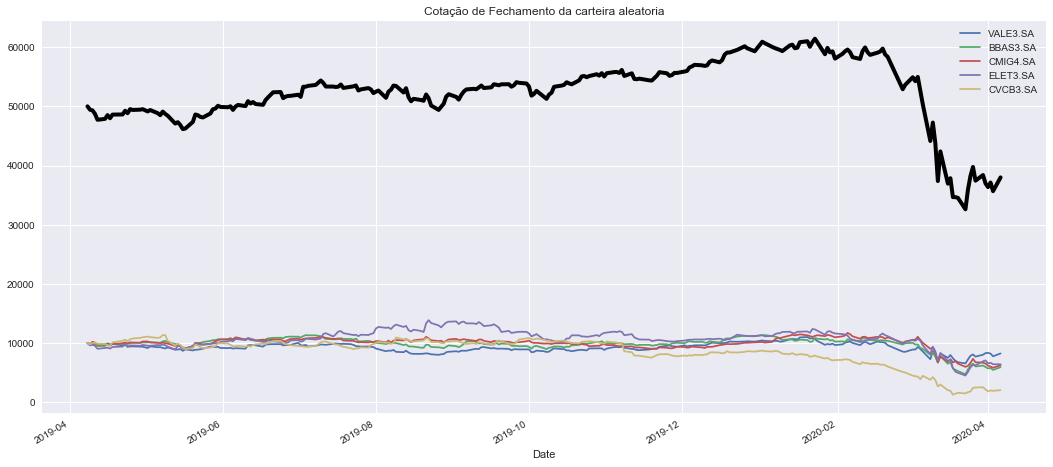

In [21]:
sns.set()
graph = carteira.plot(figsize =(18,8), title = 'Cotação de Fechamento da carteira aleatoria')
(ibov*50000).plot(linewidth=4, color='black')

In [23]:
graph.figure.savefig('Cotação_fechamento_carteira_aleatoria.png')

Plotando um grafico com todos os ativos do IBOV

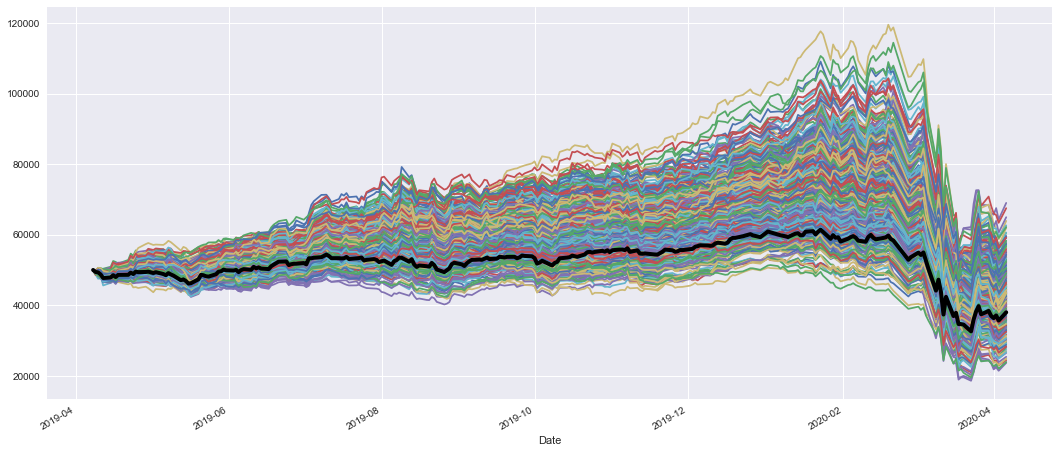

In [27]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')

In [25]:
graph1.figure.savefig("Cotação_fechamento_allAtivos_ibov.png")